In [1]:
import numpy as np
import random
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%mkdir dataset
!cp '/content/drive/MyDrive/rdr_nomap_browse.zip' dataset/
%cd dataset

/content/dataset


In [4]:
!unzip -q rdr_nomap_browse.zip 
%cd rdr_nomap_browse

/content/dataset/rdr_nomap_browse


In [5]:
import os
import random
from skimage import io
from collections import Counter
import matplotlib as plt
import pandas as pd

path = '/content/dataset/rdr_nomap_browse'
data = '/content/dataset/rdr_nomap_browse/manifest.csv'
path_dusty = '/content/dataset/rdr_nomap_browse/dusty'
path_not_dusty = '/content/dataset/rdr_nomap_browse/not_dusty'

df = pd.read_csv(data)
os.listdir(path_dusty)
path

'/content/dataset/rdr_nomap_browse'

In [6]:
df.sample(10)

,#dataset,id,label
11315,validation,003176_PSP_004509_1890_r10923_c410,dusty
12561,validation,007612_PSP_004692_1115_r1946_c717,not_dusty
4232,train,006995_PSP_004403_1070_r6361_c410,dusty
17175,test,001567_PSP_004336_1035_r8190_c1126,dusty
19084,test,004469_PSP_005101_2010_r9747_c1331,not_dusty
9037,train,000678_ESP_023384_0945_r382_c1741,not_dusty
14220,validation,000811_ESP_022844_1680_r1309_c614,not_dusty
13375,validation,002596_PSP_010780_1805_r793_c1434,not_dusty
4113,train,000147_PSP_004403_1070_r4375_c819,dusty
9499,train,004372_ESP_014383_1185_r3479_c410,not_dusty


In [7]:
Xtrain_list = []
Ytrain_list = []

for i in df.index:
  if df['#dataset'][i] == 'train' and df['label'][i] == 'not_dusty':
    Xtrain_list.append({'id':df['id'][i]})
    Ytrain_list.append({'label':df['label'][i]})

In [8]:
from skimage import io

# p = '/content/dataset/rdr_nomap_browse/not_dusty/'

Xtrain = []

curr_dir = os.getcwd()

for x in Xtrain_list:
  Xtrain.append(io.imread(curr_dir + '/' + 'not_dusty' + '/' + x['id'] + '.png'))

In [9]:
from collections import Counter
print(len(Xtrain))

4961


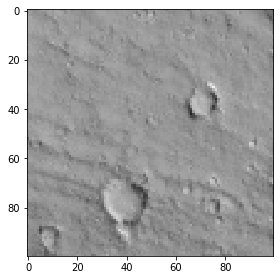

In [10]:
io.imshow(Xtrain[4000])

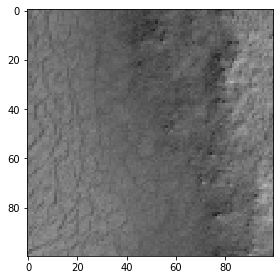

In [11]:
io.imshow(Xtrain[1102])

In [12]:
norm = np.max(Xtrain)-np.min(Xtrain)
for i in range(len(Xtrain)):
  Xtrain[i] = Xtrain[i]/norm

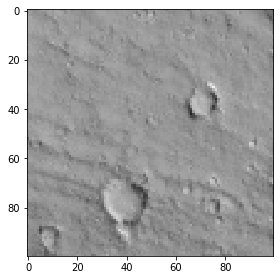

In [13]:
io.imshow(Xtrain[4000])

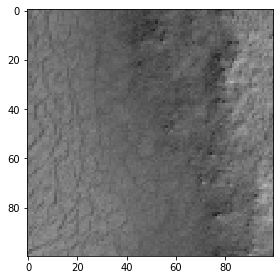

In [14]:
io.imshow(Xtrain[1102])

In [26]:
import random
import cv2

def add_noise_prm(img, l, h):

	# Getting the dimensions of the image
	row , col = img.shape
	
	# Randomly pick some pixels in the
	# image for coloring them white
	# Pick a random number between l and h
	number_of_pixels = random.randint(l, h)
	for i in range(number_of_pixels):
	
		# Pick a random y coordinate
		y_coord=random.randint(0, row - 1)
		
		# Pick a random x coordinate
		x_coord=random.randint(0, col - 1)
		
		# Color that pixel to 205-255
		img[y_coord][x_coord] = np.random.randint(175,255)
		
	# Randomly pick some pixels in
	# the image for coloring them black
	# Pick a random number between l and h
	number_of_pixels = random.randint(l , h)
	for i in range(number_of_pixels):
	
		# Pick a random y coordinate
		y_coord=random.randint(0, row - 1)
		
		# Pick a random x coordinate
		x_coord=random.randint(0, col - 1)
		
		# Color that pixel to 0-50
		img[y_coord][x_coord] = np.random.randint(125,205)
		
	return img

In [27]:
from skimage import img_as_ubyte

NoisyX= []

for x in Xtrain:
  img = img_as_ubyte(x)
  img = add_noise_prm(img,3000,4000)
  NoisyX.append(img)

In [28]:
NoisyX[0].shape

(100, 100)

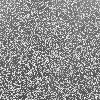

In [29]:
from google.colab.patches import cv2_imshow
cv2_imshow(NoisyX[3])

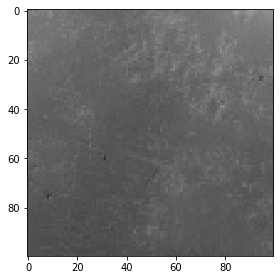

In [30]:
io.imshow(Xtrain[3])

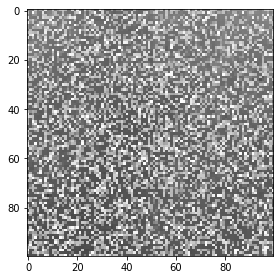

In [31]:
io.imshow(NoisyX[3])

In [32]:
X_train = np.array(Xtrain)
NoisyX = np.array(NoisyX)

(4961, 100, 100, 1)

In [ ]:
X_train = X_train.reshape(len(X_train),100,100,1)
NoisyX = NoisyX.reshape(len(NoisyX),100,100,1)
X_train.shape

In [33]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

In [47]:
# input = layers.Input(shape=(100, 100, 1))

# # Encoder
# x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
# x = layers.MaxPooling2D((2, 2), padding="same")(x)
# x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
# x = layers.MaxPooling2D((2, 2), padding="same")(x)
# x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
# x = layers.MaxPooling2D((2, 2), padding="same")(x)
# x = layers.Conv2D(32, (3, 3), activation="relu")(x)
# x = layers.MaxPooling2D((2, 2), padding="same")(x)

# # Decoder
# x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
# x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu")(x)
# x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
# x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
# x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# # Autoencoder
# autoencoder = Model(input, x)
# autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
# autoencoder.summary()

In [48]:
input = layers.Input(shape=(100, 100, 1))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 100, 100, 1)]     0         
                                                                 
 conv2d_25 (Conv2D)          (None, 100, 100, 32)      320       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 50, 50, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 50, 50, 32)        9248      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 25, 25, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_transpose_20 (Conv2D  (None, 50, 50, 32)       9248

In [49]:
autoencoder.fit(
    x=X_train,
    y=X_train,
    epochs=100,
    batch_size=64,
    shuffle=True
)

Epoch 1/100
78/78 [==============================] - 4s 44ms/step - loss: 0.6468
Epoch 2/100
78/78 [==============================] - 3s 43ms/step - loss: 0.6205
Epoch 3/100
78/78 [==============================] - 3s 42ms/step - loss: 0.6195
Epoch 4/100
78/78 [==============================] - 3s 43ms/step - loss: 0.6190
Epoch 5/100
78/78 [==============================] - 3s 43ms/step - loss: 0.6187
Epoch 6/100
78/78 [==============================] - 3s 43ms/step - loss: 0.6184
Epoch 7/100
78/78 [==============================] - 3s 42ms/step - loss: 0.6182
Epoch 8/100
78/78 [==============================] - 3s 42ms/step - loss: 0.6181
Epoch 9/100
78/78 [==============================] - 3s 43ms/step - loss: 0.6180
Epoch 10/100
78/78 [==============================] - 4s 45ms/step - loss: 0.6178
Epoch 11/100
78/78 [==============================] - 3s 43ms/step - loss: 0.6178
Epoch 12/100
78/78 [==============================] - 3s 43ms/step - loss: 0.6177
Epoch 13/100
78/78 [=====

In [50]:
predictions = autoencoder.predict(X_train)

156/156 [==============================] - 1s 9ms/step


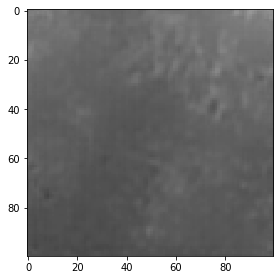

In [51]:
preds = predictions[3].reshape(100,100)
io.imshow(preds, cmap='gray')

In [52]:
preds.shape

(100, 100)

In [53]:
autoencoder.fit(
    x=NoisyX,
    y=X_train,
    epochs=100,
    batch_size=64,
    shuffle=True
)

Epoch 1/100
78/78 [==============================] - 4s 44ms/step - loss: 7.0870
Epoch 2/100
78/78 [==============================] - 3s 41ms/step - loss: 0.6880
Epoch 3/100
78/78 [==============================] - 3s 41ms/step - loss: 0.6879
Epoch 4/100
78/78 [==============================] - 3s 41ms/step - loss: 0.6879
Epoch 5/100
78/78 [==============================] - 3s 41ms/step - loss: 0.6879
Epoch 6/100
78/78 [==============================] - 3s 41ms/step - loss: 0.6879
Epoch 7/100
78/78 [==============================] - 3s 41ms/step - loss: 0.6880
Epoch 8/100
78/78 [==============================] - 3s 41ms/step - loss: 0.6879
Epoch 9/100
78/78 [==============================] - 3s 41ms/step - loss: 0.6879
Epoch 10/100
78/78 [==============================] - 3s 41ms/step - loss: 0.6879
Epoch 11/100
78/78 [==============================] - 3s 41ms/step - loss: 0.6880
Epoch 12/100
78/78 [==============================] - 3s 41ms/step - loss: 0.6880
Epoch 13/100
78/78 [=====

156/156 [==============================] - 1s 8ms/step


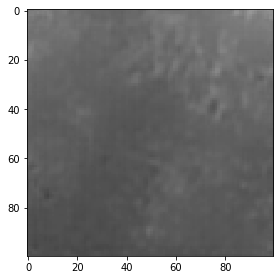

In [54]:
predictions_n = autoencoder.predict(NoisyX)
preds_n = predictions_n[5].reshape(100,100)
io.imshow(preds)

In [55]:
from PIL import Image
pil_arr = []
for x in predictions_n:
  v = x.reshape(100,100)
  pil_arr.append(v)

In [56]:
from PIL import Image
pil_arr_train = []
for x in Xtrain:
  v = x.reshape(100,100)
  pil_arr_train.append(v)

In [70]:
from PIL import Image
pil_arr_noise = []
for x in NoisyX:
  v = x.reshape(100,100)
  pil_arr_noise.append(v)

In [71]:
pil_arr = pil_arr[0:20]
pil_arr_train = pil_arr_train[0:20]
pil_arr_Noisy = pil_arr_noise[0:20]

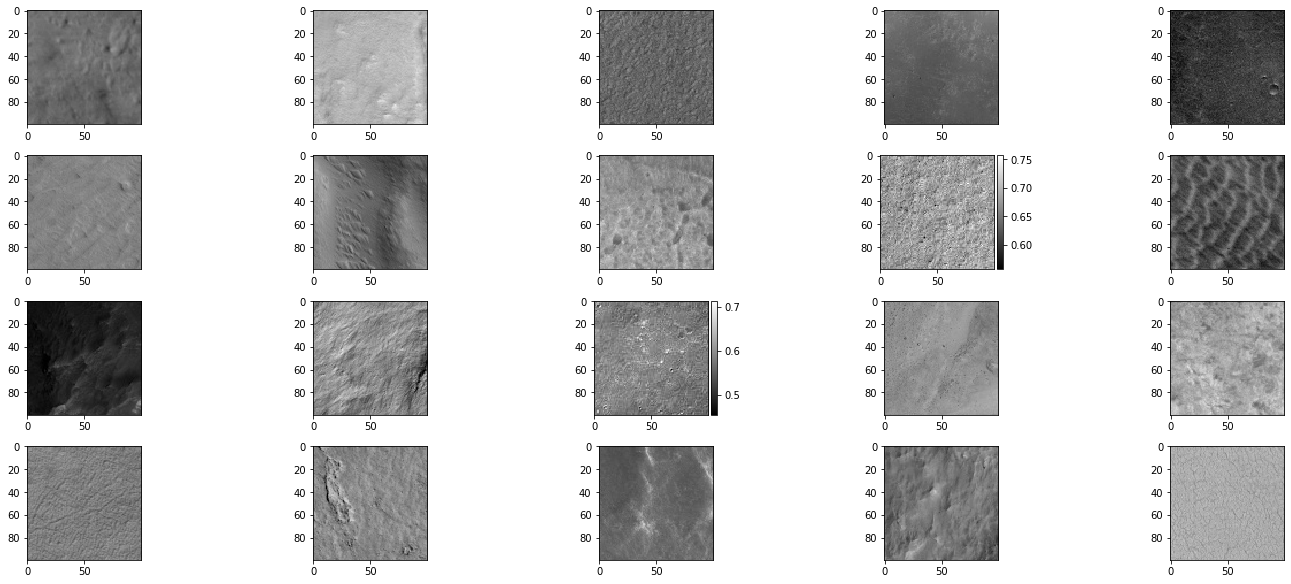

In [59]:
plt.figure(figsize=(20,10))
columns = 5

for i, image in enumerate(pil_arr_train):
  plt.subplot(len(pil_arr_train) / columns + 1, columns, i + 1)
  io.imshow(image, cmap='gray')

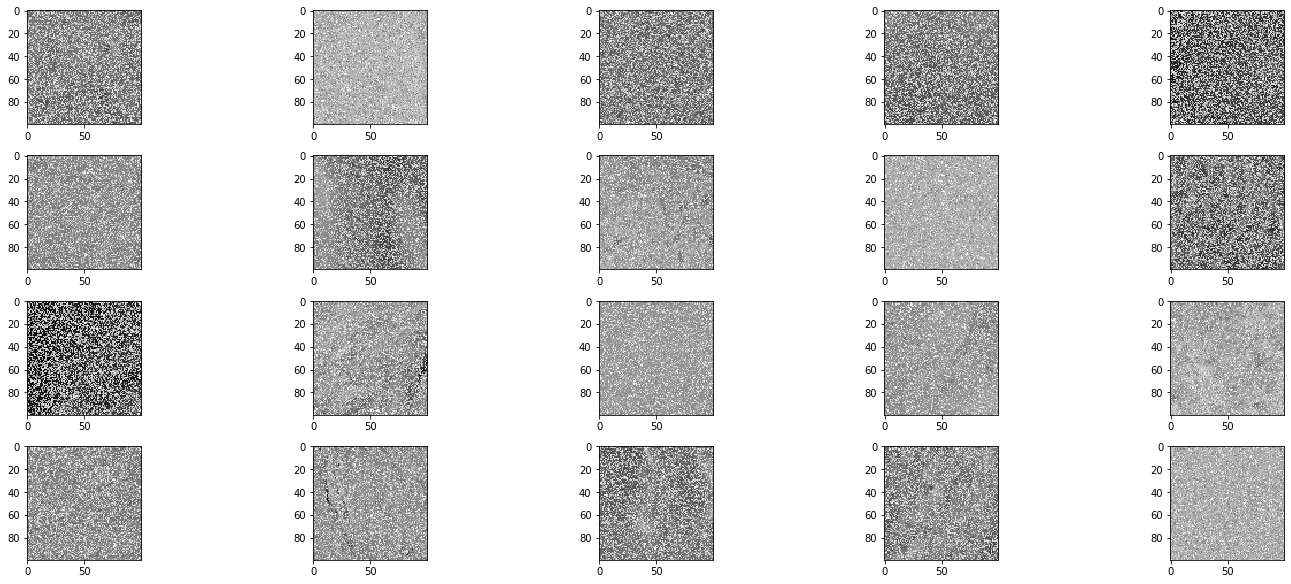

In [74]:
plt.figure(figsize=(20,10))
columns = 5

for i, image in enumerate(pil_arr_Noisy):
  plt.subplot(len(pil_arr_Noisy) / columns + 1, columns, i + 1)
  io.imshow(image, cmap='gray')

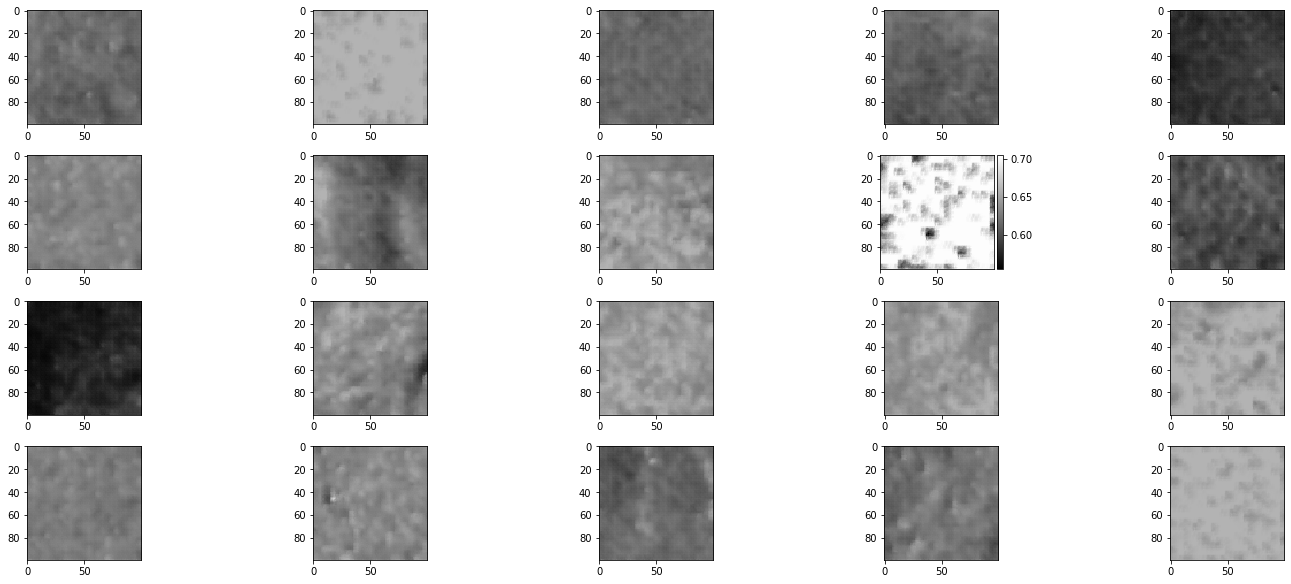

In [60]:
plt.figure(figsize=(20,10))
columns = 5

for i, image in enumerate(pil_arr):
  plt.subplot(len(pil_arr) / columns + 1, columns, i + 1)
  io.imshow(image, cmap='gray')

In [91]:
import cv2
from skimage import img_as_ubyte

XtrainRs = []

for i in range(len(Xtrain)):
  res = cv2.resize(Xtrain[i], dsize=(128, 128), interpolation=cv2.INTER_LINEAR)
  XtrainRs.append(res)

NoisyXrs= []

for x in XtrainRs:
  img = img_as_ubyte(x)
  img = add_noise_prm(img,3000,4000)
  NoisyXrs.append(img)

X_trainRs = np.array(XtrainRs)
NoisyXrs = np.array(NoisyXrs)
X_trainRs = X_trainRs.reshape(len(X_trainRs),128,128,1)
NoisyXrs = NoisyXrs.reshape(len(NoisyXrs),128,128,1)
X_trainRs.shape

(4961, 128, 128, 1)

In [92]:
input = layers.Input(shape=(128, 128, 1))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder_rs = Model(input, x)
autoencoder_rs.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder_rs.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 128, 128, 1)]     0         
                                                                 
 conv2d_40 (Conv2D)          (None, 128, 128, 32)      320       
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 32, 32, 32)        9248

In [93]:
autoencoder_rs.fit(
    x=NoisyXrs,
    y=X_trainRs,
    epochs=250,
    batch_size=64,
    shuffle=True
)

Epoch 1/250
78/78 [==============================] - 7s 67ms/step - loss: 0.6534
Epoch 2/250
78/78 [==============================] - 5s 61ms/step - loss: 0.6280
Epoch 3/250
78/78 [==============================] - 5s 62ms/step - loss: 0.6244
Epoch 4/250
78/78 [==============================] - 5s 62ms/step - loss: 0.6246
Epoch 5/250
78/78 [==============================] - 5s 64ms/step - loss: 0.6238
Epoch 6/250
78/78 [==============================] - 5s 63ms/step - loss: 0.6231
Epoch 7/250
78/78 [==============================] - 5s 63ms/step - loss: 0.6230
Epoch 8/250
78/78 [==============================] - 5s 62ms/step - loss: 0.6226
Epoch 9/250
78/78 [==============================] - 5s 63ms/step - loss: 0.6225
Epoch 10/250
78/78 [==============================] - 5s 64ms/step - loss: 0.6226
Epoch 11/250
78/78 [==============================] - 5s 63ms/step - loss: 0.6220
Epoch 12/250
78/78 [==============================] - 5s 63ms/step - loss: 0.6225
Epoch 13/250
78/78 [=====

156/156 [==============================] - 2s 13ms/step


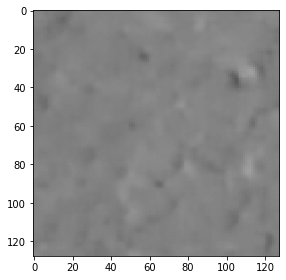

In [95]:
predictions_xrs = autoencoder_rs.predict(NoisyXrs)
preds_xrs = predictions_xrs[5].reshape(128,128)
io.imshow(preds_xrs, cmap='gray')

In [96]:
from PIL import Image
pil_arr_rs = []
for x in predictions_xrs:
  v = x.reshape(128,128)
  pil_arr_rs.append(v)


from PIL import Image
pil_arr_train_xrs = []
for x in XtrainRs:
  v = x.reshape(128,128)
  pil_arr_train_xrs.append(v)


from PIL import Image
pil_arr_noise_xrs = []
for x in NoisyXrs:
  v = x.reshape(128,128)
  pil_arr_noise_xrs.append(v)

pil_arr_xrs = pil_arr_rs[0:20]
pil_arr_train_xrs = pil_arr_train_xrs[0:20]
pil_arr_noise_xrs = pil_arr_noise_xrs[0:20]

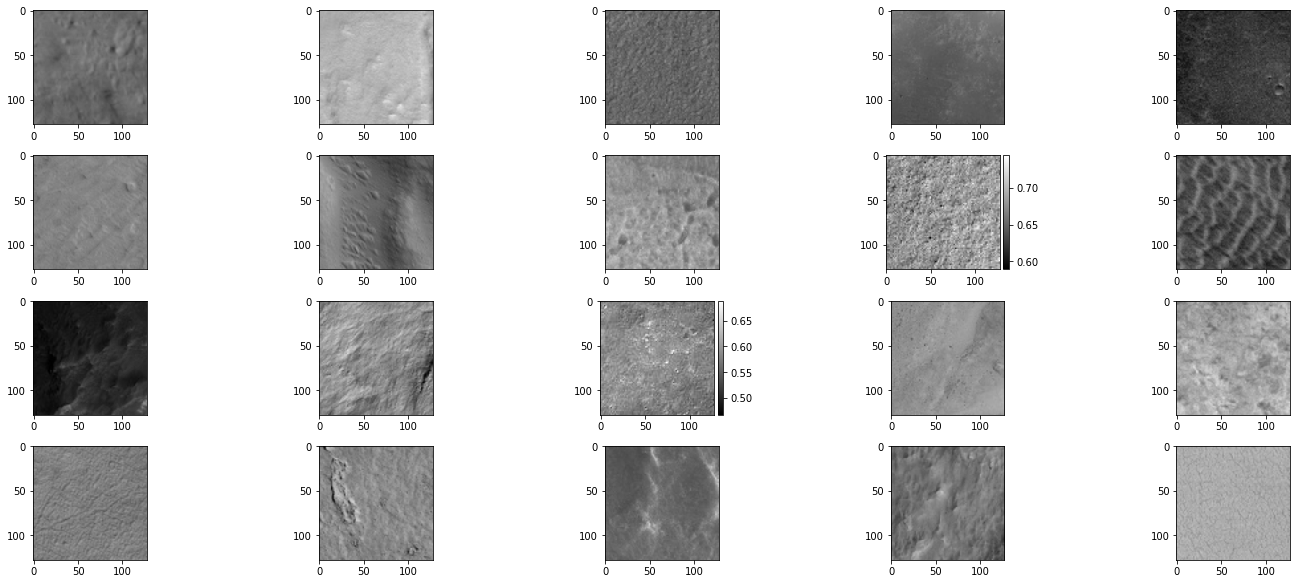

In [97]:
plt.figure(figsize=(20,10))
columns = 5

for i, image in enumerate(pil_arr_train_xrs):
  plt.subplot(len(pil_arr_train_xrs) / columns + 1, columns, i + 1)
  io.imshow(image, cmap='gray')

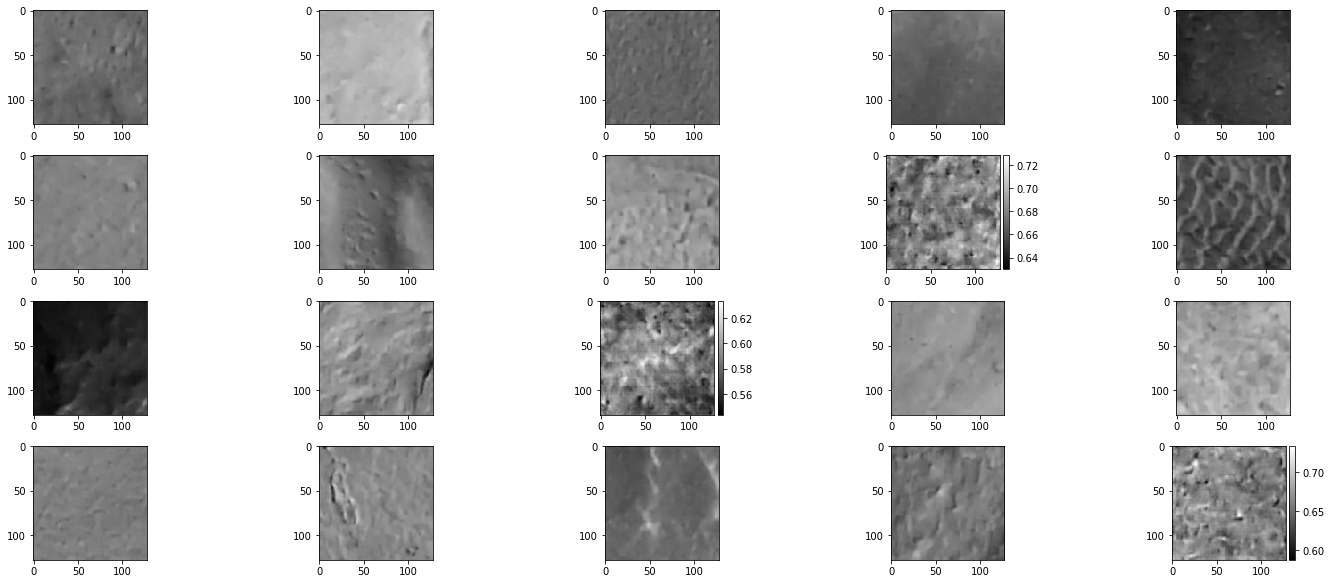

In [98]:
plt.figure(figsize=(20,10))
columns = 5

for i, image in enumerate(pil_arr_xrs):
  plt.subplot(len(pil_arr_xrs) / columns + 1, columns, i + 1)
  io.imshow(image, cmap='gray')

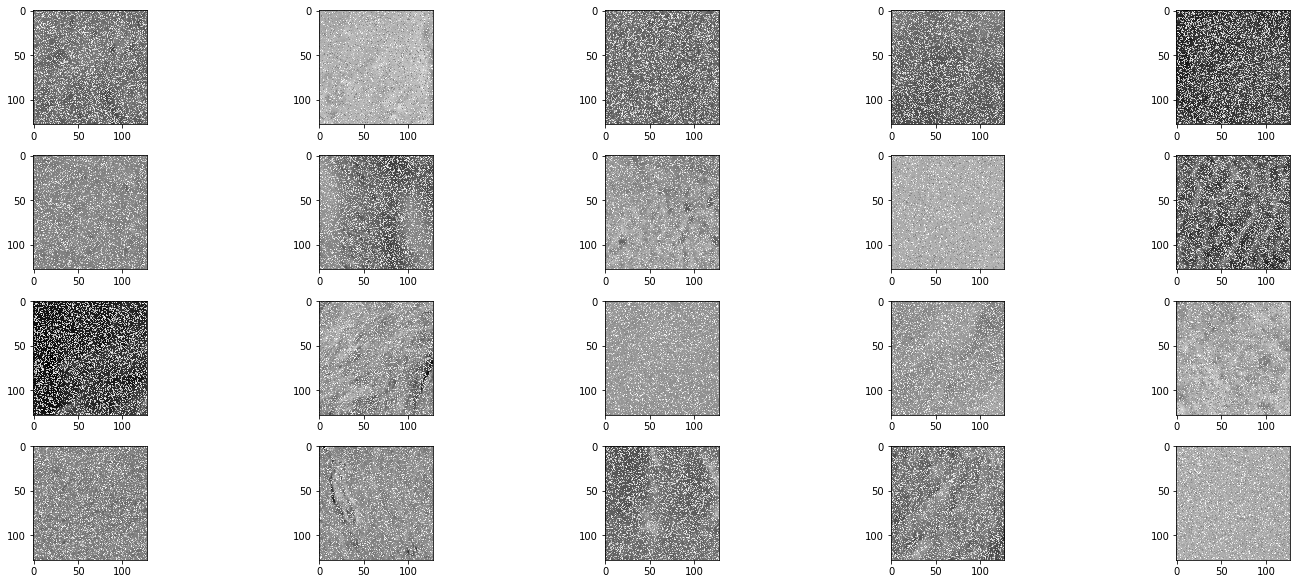

In [99]:
plt.figure(figsize=(20,10))
columns = 5

for i, image in enumerate(pil_arr_noise_xrs):
  plt.subplot(len(pil_arr_noise_xrs) / columns + 1, columns, i + 1)
  io.imshow(image, cmap='gray')